**Random forest**

Water Quality Classification Report:
                 precision    recall  f1-score   support

           Poor       0.90      0.81      0.85       171
Needs Treatment       0.00      0.00      0.00        10
           Good       0.90      0.96      0.93       419

       accuracy                           0.90       600
      macro avg       0.60      0.59      0.59       600
   weighted avg       0.89      0.90      0.89       600


Drinking Water Accuracy:
0.9

Feature Importances:
                   Feature  Importance
4                  Salinty    0.172890
7                       pH    0.163760
3         Suspended Matter    0.154731
2  Dissolved Oxygen Matter    0.153266
1         Dissolved Oxygen    0.118357
6                Turbidity    0.084195
0              Chlorophyll    0.081992
5              Temperature    0.070808


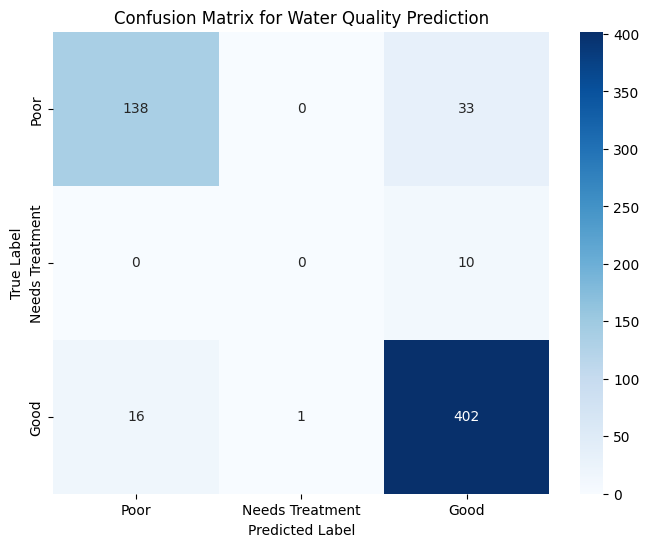


Model saved successfully as: C:/Users/KIIT/Desktop/TestingMajor/SavedModels/random_model.sav


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

# Load the dataset
file_path = "C:/Users/KIIT/Desktop/AqualQ/src/data/generated_water_quality_data_with_dates.csv"  # Replace with your file path
df = pd.read_csv(file_path)

# Encode target variables
water_quality_mapping = {'Good': 2, 'Needs Treatment': 1, 'Poor': 0}
df['Water Quality'] = df['Water Quality'].map(water_quality_mapping)

# Features and target for Water Quality prediction
X = df.drop(columns=['Water Quality', 'Drinking Water', 'Date'])
y = df['Water Quality']

# Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict Water Quality
y_pred_quality = rf_model.predict(X_test)

# Derive Drinking Water predictions from Water Quality predictions
def derive_drinking_water(quality_pred):
    return ['Yes' if q == 2 else 'No' for q in quality_pred]

y_pred_drinking = derive_drinking_water(y_pred_quality)

# Derive actual Drinking Water labels from the test data
actual_drinking_water = ['Yes' if q == 2 else 'No' for q in y_test]

# Evaluate the model
print("Water Quality Classification Report:")
print(classification_report(y_test, y_pred_quality, target_names=['Poor', 'Needs Treatment', 'Good']))

print("/nDrinking Water Accuracy:")
print(accuracy_score(actual_drinking_water, y_pred_drinking))

# Feature importance (optional, to interpret the model)
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("/nFeature Importances:")
print(feature_importance_df)

conf_matrix = confusion_matrix(y_test, y_pred_quality)

# Plot the confusion matrix using seaborn for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Poor', 'Needs Treatment', 'Good'], yticklabels=['Poor', 'Needs Treatment', 'Good'])
plt.title("Confusion Matrix for Water Quality Prediction")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Save the Random Forest model (replace with your desired filename)
model_filename = "C:/Users/KIIT/Desktop/AqualQ/src/SavedModels/random_model.sav"
joblib.dump(rf_model, model_filename)

print(f"/nModel saved successfully as: {model_filename}")
